In [1]:
import numpy as np
import pandas as  pd

import matplotlib.pyplot as plt
from scipy import  stats
import statsmodels.api as sm  # 统计相关的库

In [2]:
Risk_free = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\Risk_free_rate.xlsx') #read data 
Risk_free['rate_daily'] = Risk_free['rate']/36000

# brent_spot=pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\brent_spot.xlsx') #read data 
# brent_future = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\brent_future.xlsx') #read data 
# brent_spot_future = brent_spot.join(brent_future.set_index('date'),on='date',how = 'inner',rsuffix = '_future')
# brent_spot_future_rate = brent_spot_future.join(Risk_free.set_index('date'), on= 'date',how='inner',rsuffix='risk_free')

WTI_spot = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\WTI_spot.xlsx') #read data 
WTI_future = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\WTI_future.xlsx') #read data 
WTI_spot_future = WTI_spot.join(WTI_future.set_index('date'),on='date',how = 'inner',rsuffix = '_future')
WTI_spot_future_rate = WTI_spot_future.join(Risk_free.set_index('date'), on= 'date',how='inner',rsuffix='risk_free')
WTI_spot_future_rate['year_month'] = WTI_spot_future_rate['date'].apply(lambda x : str(x.year)+'-0'+str(x.month) if x.month<10 else str(x.year)+'-'+str(x.month)  )

WTI_spot_future_rate

,date,price,price_future,rate,rate_daily,year_month
0,1986-01-02,25.56,25.56,7.64,0.000212,1986-01
1,1986-01-03,26.00,25.97,7.65,0.000213,1986-01
2,1986-01-06,26.53,26.57,7.64,0.000212,1986-01
3,1986-01-07,25.85,26.20,7.59,0.000211,1986-01
4,1986-01-08,25.87,25.93,7.73,0.000215,1986-01
...,...,...,...,...,...,...
9139,2022-03-22,111.03,111.76,1.59,0.000044,2022-03
9140,2022-03-23,114.89,114.93,1.52,0.000042,2022-03
9141,2022-03-24,114.20,112.34,1.55,0.000043,2022-03
9142,2022-03-25,116.20,113.90,1.67,0.000046,2022-03


In [3]:
GEPU = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\Global_Policy_Uncertainty_Data.xlsx') #Global economic uncertainty
economic_real_activity = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\economic_real_activity.xlsx') #Trade policy

# WUI = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\WUI.xlsx') #World uncertainty
# GPR = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\GPR.xlsx') #Geopolica Risk
# MPU = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\MPU.xlsx') #Monetary Policy
# TPU = pd.read_excel(r'C:\apache\jupyter\金融计量\MIDAS_DATA\TPU.xlsx') #Trade policy

In [4]:
economic_real_activity['year_month'] = economic_real_activity['Date'].astype(str).apply(lambda x: x[0:7])
economic_real_activity = economic_real_activity[['year_month','economic_real_activity']]
economic_real_activity

,year_month,economic_real_activity
0,1968-01,-11.988971
1,1968-02,-8.669224
2,1968-03,-10.506683
3,1968-04,-10.633849
4,1968-05,-9.901796
...,...,...
645,2021-10,108.856590
646,2021-11,53.291444
647,2021-12,54.735097
648,2022-01,6.745922


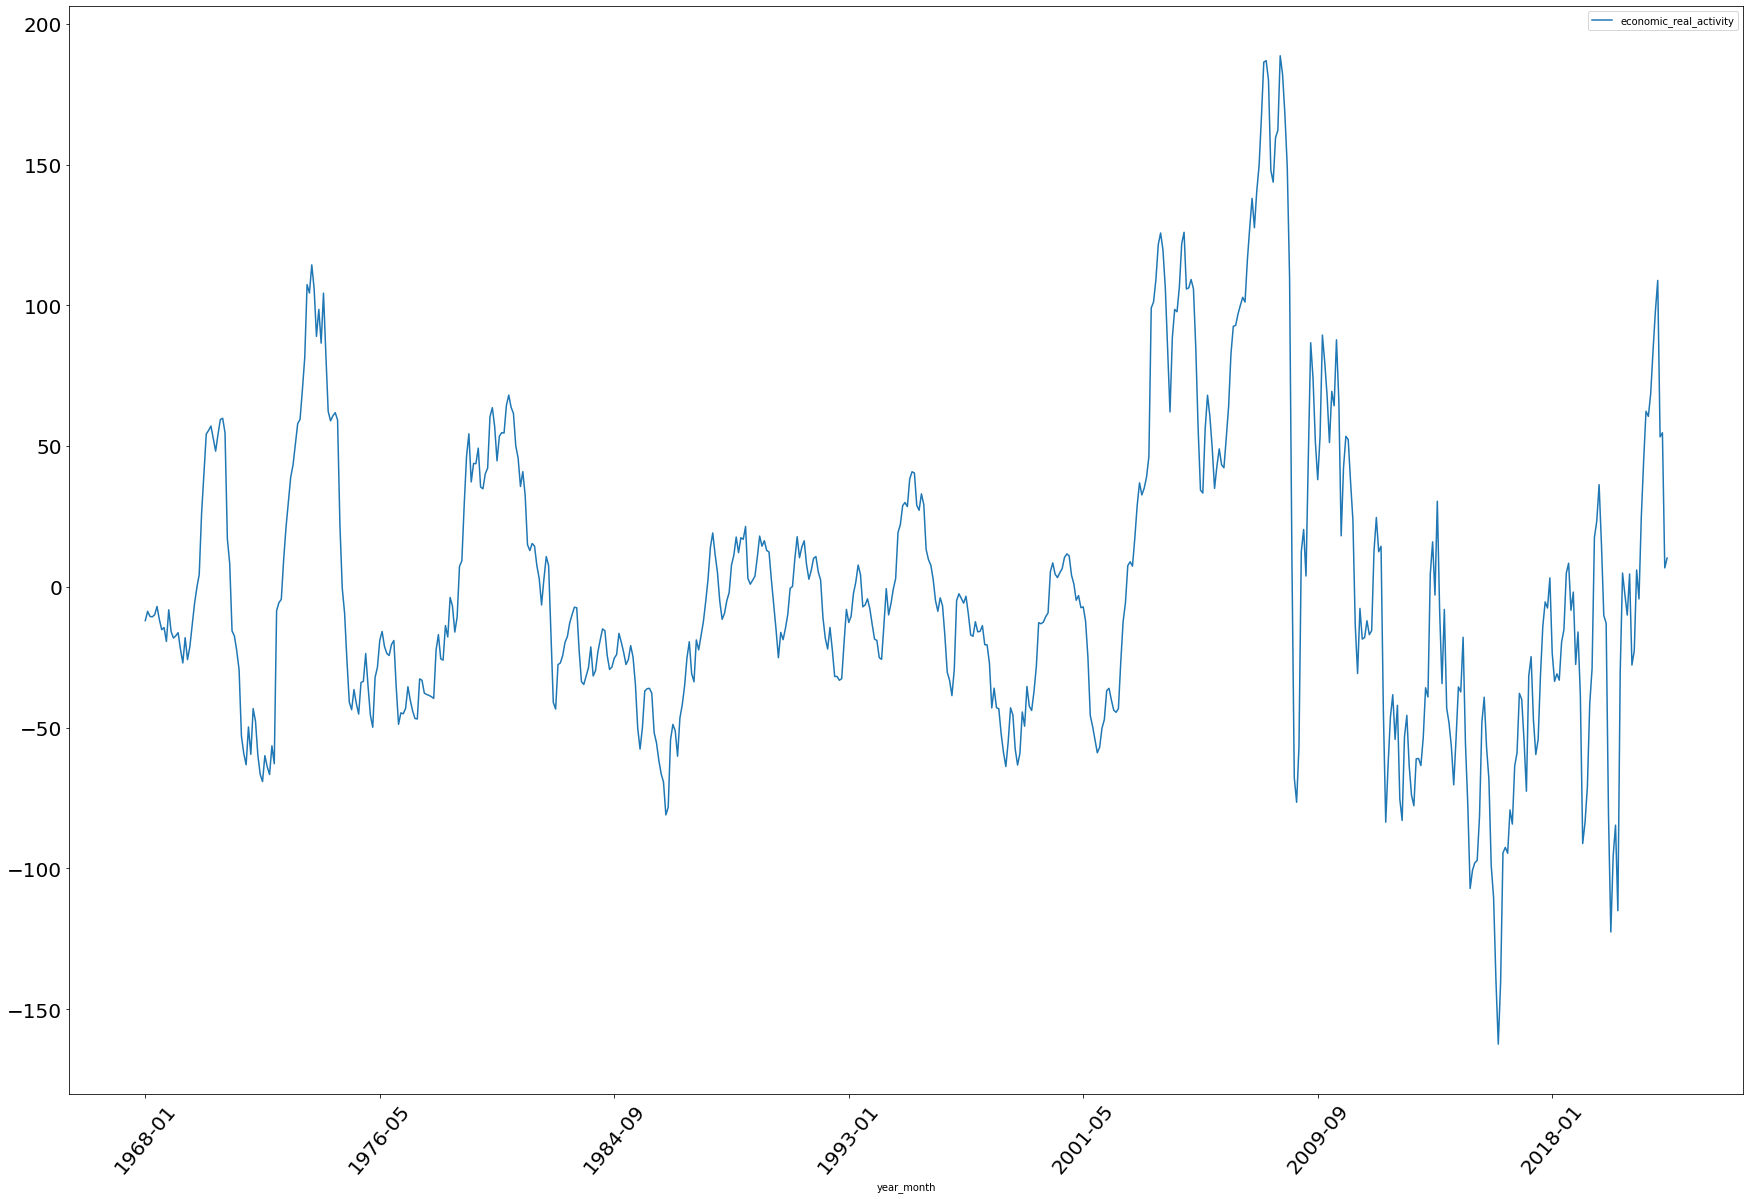

In [30]:
#数据可视化
ax = economic_real_activity.plot(kind='line',x = 'year_month',x_compat=True,fontsize=20,rot=50,
             y=['economic_real_activity'], #2个变量可视化
             subplots=True, #多子图并存
             layout=(1, 1), #子图排列3行2列
             figsize=(30, 20)) #图布的尺寸

In [31]:
GEPU = GEPU[0:302]
GEPU['year_month'] = GEPU['Year'].astype(str)+ '-' + GEPU['Month'].astype(int).astype(str).apply(lambda x: '0'+x if len(x)==1 else x )
GEPU = GEPU[['year_month','GEPU_ppp']]
GEPU

,year_month,GEPU_ppp
0,1997-01,80.112685
1,1997-02,82.377463
2,1997-03,67.599781
3,1997-04,76.091322
4,1997-05,72.860622
...,...,...
297,2021-10,201.086995
298,2021-11,230.555667
299,2021-12,269.853623
300,2022-01,241.512251


In [32]:
GEPU_REA = GEPU.join(economic_real_activity.set_index('year_month'),how='inner',on='year_month')
GEPU_REA

,year_month,GEPU_ppp,economic_real_activity
0,1997-01,80.112685,-4.091409
1,1997-02,82.377463,-5.771835
2,1997-03,67.599781,-3.331994
3,1997-04,76.091322,-9.616492
4,1997-05,72.860622,-17.053035
...,...,...,...
297,2021-10,201.086995,108.856590
298,2021-11,230.555667,53.291444
299,2021-12,269.853623,54.735097
300,2022-01,241.512251,6.745922


In [33]:
#数据标准化
from sklearn import preprocessing

GEPU_REA['GEPU_ppp_std'] = preprocessing.scale(GEPU_REA['GEPU_ppp'])
GEPU_REA['economic_real_activity_std'] = preprocessing.scale(GEPU_REA['economic_real_activity'])
GEPU_REA

,year_month,GEPU_ppp,economic_real_activity,GEPU_ppp_std,economic_real_activity_std
0,1997-01,80.112685,-4.091409,-0.731695,-0.122374
1,1997-02,82.377463,-5.771835,-0.699663,-0.146931
2,1997-03,67.599781,-3.331994,-0.908673,-0.111277
3,1997-04,76.091322,-9.616492,-0.788572,-0.203115
4,1997-05,72.860622,-17.053035,-0.834265,-0.311788
...,...,...,...,...,...
297,2021-10,201.086995,108.856590,0.979317,1.528186
298,2021-11,230.555667,53.291444,1.396110,0.716187
299,2021-12,269.853623,54.735097,1.951924,0.737284
300,2022-01,241.512251,6.745922,1.551075,0.035997


In [37]:
#WTI_gepu_rea = WTI_spot_future_rate.join(GEPU_REA.set_index('year_month'),how='inner',on='year_month',rsuffix='_macro')
WTI_gepu_rea

,date,price,price_future,rate,rate_daily,year_month,GEPU_ppp,economic_real_activity,GEPU_ppp_std,economic_real_activity_std,LogReturn_spot,LogReturn_future
2796,1997-01-02,25.55,25.69,5.63,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,NaN,NaN
2797,1997-01-03,25.55,25.59,5.60,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,0.000000,-0.003900
2798,1997-01-06,26.25,26.37,5.61,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,0.027029,0.030025
2799,1997-01-07,26.25,26.23,5.61,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,0.000000,-0.005323
2800,1997-01-08,26.55,26.62,5.61,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,0.011364,0.014759
...,...,...,...,...,...,...,...,...,...,...,...,...
9119,2022-02-22,92.11,92.35,1.17,0.000032,2022-02,190.351633,10.231600,0.827480,0.086934,0.009271,0.013957
9120,2022-02-23,92.14,92.10,1.16,0.000032,2022-02,190.351633,10.231600,0.827480,0.086934,0.000326,-0.002711
9121,2022-02-24,92.77,92.81,1.08,0.000030,2022-02,190.351633,10.231600,0.827480,0.086934,0.006814,0.007679
9122,2022-02-25,91.68,91.59,1.13,0.000031,2022-02,190.351633,10.231600,0.827480,0.086934,-0.011819,-0.013232


In [38]:
WTI_gepu_rea['LogReturn_spot']=np.log(WTI_gepu_rea['price']/WTI_gepu_rea['price'].shift(1))
WTI_gepu_rea['LogReturn_future']=np.log(WTI_gepu_rea['price_future']/WTI_gepu_rea['price_future'].shift(1))
WTI_gepu_rea = WTI_gepu_rea.dropna()
WTI_gepu_rea

,date,price,price_future,rate,rate_daily,year_month,GEPU_ppp,economic_real_activity,GEPU_ppp_std,economic_real_activity_std,LogReturn_spot,LogReturn_future
2797,1997-01-03,25.55,25.59,5.60,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,0.000000,-0.003900
2798,1997-01-06,26.25,26.37,5.61,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,0.027029,0.030025
2799,1997-01-07,26.25,26.23,5.61,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,0.000000,-0.005323
2800,1997-01-08,26.55,26.62,5.61,0.000156,1997-01,80.112685,-4.091409,-0.731695,-0.122374,0.011364,0.014759
2801,1997-01-09,26.30,26.37,5.57,0.000155,1997-01,80.112685,-4.091409,-0.731695,-0.122374,-0.009461,-0.009436
...,...,...,...,...,...,...,...,...,...,...,...,...
9119,2022-02-22,92.11,92.35,1.17,0.000032,2022-02,190.351633,10.231600,0.827480,0.086934,0.009271,0.013957
9120,2022-02-23,92.14,92.10,1.16,0.000032,2022-02,190.351633,10.231600,0.827480,0.086934,0.000326,-0.002711
9121,2022-02-24,92.77,92.81,1.08,0.000030,2022-02,190.351633,10.231600,0.827480,0.086934,0.006814,0.007679
9122,2022-02-25,91.68,91.59,1.13,0.000031,2022-02,190.351633,10.231600,0.827480,0.086934,-0.011819,-0.013232


In [44]:
WTI_gepu_rea[['GEPU_ppp', 'economic_real_activity']].corr()

,GEPU_ppp,economic_real_activity
GEPU_ppp,1.000000,-0.302654
economic_real_activity,-0.302654,1.000000


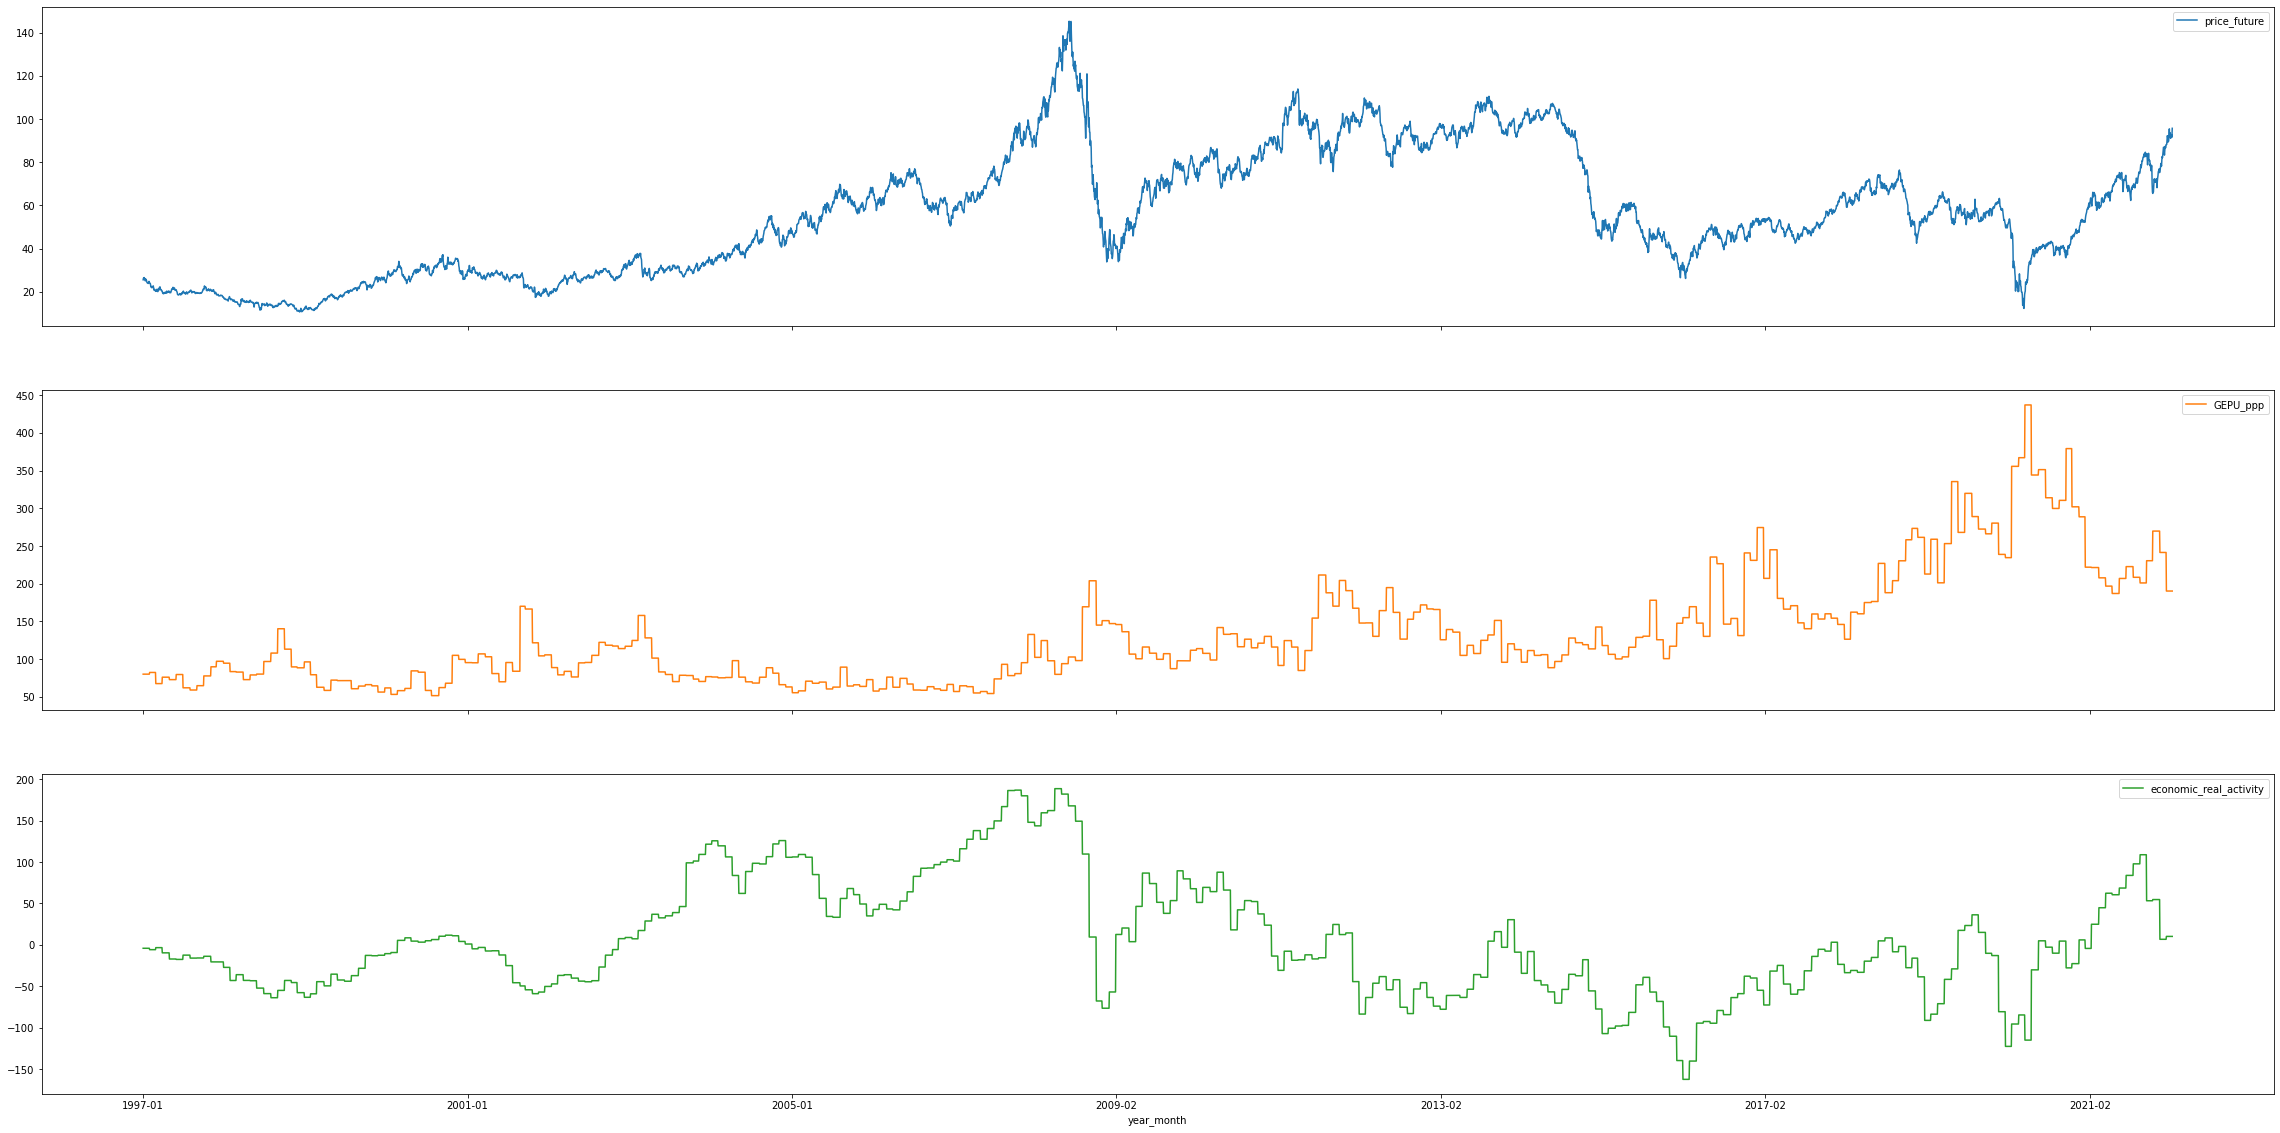

In [40]:
#数据可视化
ax = WTI_gepu_rea.plot(kind='line',x='year_month',
 y=['price_future','GEPU_ppp','economic_real_activity'], #2个变量可视化
 subplots=True, #多子图并存
 layout=(3, 1), #子图排列3行2列
 figsize=(40, 20)) #图布的尺寸

In [39]:
writer = pd.ExcelWriter('WTI_gepu_rea.xlsx')
WTI_gepu_rea.to_excel(writer)
writer.save()
print('DataFrame is written successfully to the Excel File.')

DataFrame is written successfully to the Excel File.


In [20]:
GPR['year_month'] = GPR['date'].apply(lambda x:str(x)[0:7])
GPR = GPR[['year_month','GPR']]
GPR

,year_month,GPR
0,1985-01,102.173378
1,1985-02,117.102020
2,1985-03,124.778152
3,1985-04,87.929001
4,1985-05,103.262848
...,...,...
441,2021-10,81.145081
442,2021-11,89.097916
443,2021-12,108.613159
444,2022-01,140.826874


In [22]:
WTI_gepu_gpr = WTI_gepu.join(GPR.set_index('year_month'),how='inner',on='year_month',rsuffix='_gpr')
WTI_gepu_gpr

,date,price,price_future,rate,rate_daily,year_month,GEPU_ppp,GEPU_ppp_diff,GPR
2818,1997-02-03,24.20,24.15,5.54,0.000154,1997-02,82.377463,0.027878,50.559940
2819,1997-02-04,24.00,24.02,5.54,0.000154,1997-02,82.377463,0.027878,50.559940
2820,1997-02-05,23.90,23.91,5.53,0.000154,1997-02,82.377463,0.027878,50.559940
2821,1997-02-06,23.05,23.10,5.53,0.000154,1997-02,82.377463,0.027878,50.559940
2822,1997-02-07,22.30,22.23,5.49,0.000152,1997-02,82.377463,0.027878,50.559940
...,...,...,...,...,...,...,...,...,...
9119,2022-02-22,92.11,92.35,1.17,0.000032,2022-02,190.351633,-0.238047,178.901871
9120,2022-02-23,92.14,92.10,1.16,0.000032,2022-02,190.351633,-0.238047,178.901871
9121,2022-02-24,92.77,92.81,1.08,0.000030,2022-02,190.351633,-0.238047,178.901871
9122,2022-02-25,91.68,91.59,1.13,0.000031,2022-02,190.351633,-0.238047,178.901871


In [25]:

WTI_gepu_gpr['LogReturn_spot']=np.log(WTI_gepu_gpr['price']/WTI_gepu_gpr['price'].shift(1))
WTI_gepu_gpr['LogReturn_future']=np.log(WTI_gepu_gpr['price_future']/WTI_gepu_gpr['price_future'].shift(1))
WTI_gepu_gpr = WTI_gepu_gpr.dropna()
WTI_gepu_gpr

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,price,price_future,rate,rate_daily,year_month,GEPU_ppp,GEPU_ppp_diff,GPR,LogReturn_spot,LogReturn_future
2819,1997-02-04,24.00,24.02,5.54,0.000154,1997-02,82.377463,0.027878,50.559940,-0.008299,-0.005398
2820,1997-02-05,23.90,23.91,5.53,0.000154,1997-02,82.377463,0.027878,50.559940,-0.004175,-0.004590
2821,1997-02-06,23.05,23.10,5.53,0.000154,1997-02,82.377463,0.027878,50.559940,-0.036213,-0.034464
2822,1997-02-07,22.30,22.23,5.49,0.000152,1997-02,82.377463,0.027878,50.559940,-0.033079,-0.038390
2823,1997-02-10,22.45,22.46,5.50,0.000153,1997-02,82.377463,0.027878,50.559940,0.006704,0.010293
...,...,...,...,...,...,...,...,...,...,...,...
9119,2022-02-22,92.11,92.35,1.17,0.000032,2022-02,190.351633,-0.238047,178.901871,0.009271,0.013957
9120,2022-02-23,92.14,92.10,1.16,0.000032,2022-02,190.351633,-0.238047,178.901871,0.000326,-0.002711
9121,2022-02-24,92.77,92.81,1.08,0.000030,2022-02,190.351633,-0.238047,178.901871,0.006814,0.007679
9122,2022-02-25,91.68,91.59,1.13,0.000031,2022-02,190.351633,-0.238047,178.901871,-0.011819,-0.013232


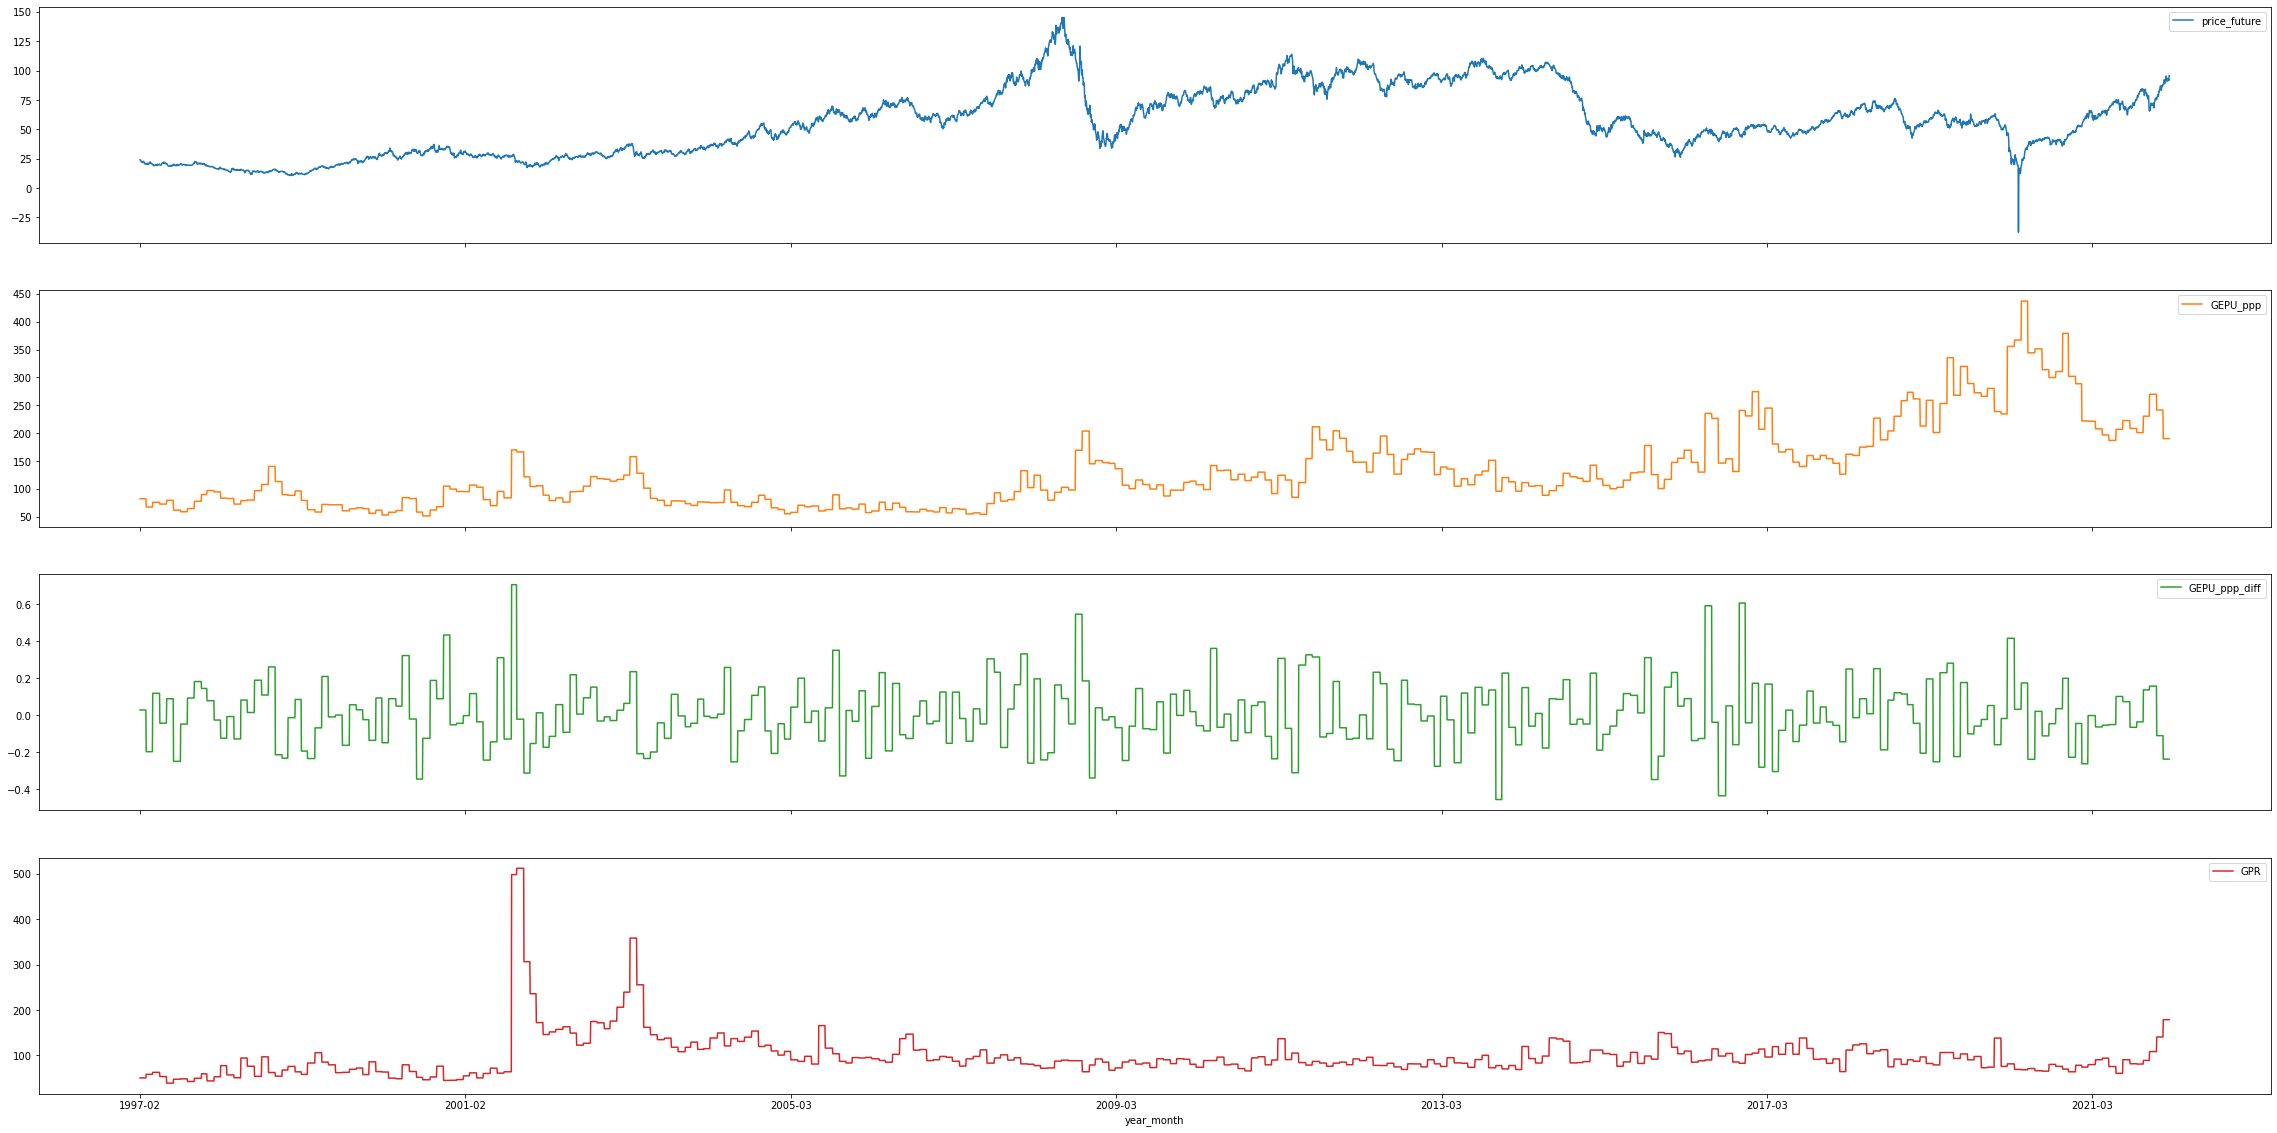

In [23]:
#数据可视化
ax = WTI_gepu_gpr.plot(kind='line',x='year_month',
 y=['price_future','GEPU_ppp','GEPU_ppp_diff','GPR',], #2个变量可视化
 subplots=True, #多子图并存
 layout=(4, 1), #子图排列3行2列
 figsize=(40, 20)) #图布的尺寸

In [26]:
writer = pd.ExcelWriter('WTI_gepu_gpr.xlsx')
WTI_gepu_gpr.to_excel(writer)
writer.save()
print('DataFrame is written successfully to the Excel File.')

DataFrame is written successfully to the Excel File.


In [4]:
TPU['year_month'] = TPU['DATE'].apply(lambda x:str(x)[0:7])
TPU = TPU[['year_month','TPU']]
TPU

,year_month,TPU
0,1960-01,18.129701
1,1960-02,11.492717
2,1960-03,15.225482
3,1960-04,18.046972
4,1960-05,17.723792
...,...,...
741,2021-10,56.224900
742,2021-11,47.902641
743,2021-12,37.150492
744,2022-01,46.676747


In [5]:
MPU['year_month'] = MPU['Year'].astype(str)+ '-' + MPU['Month'].astype(int).astype(str).apply(lambda x: '0'+x if len(x)==1 else x )
MPU.rename(inplace=1,columns={'BBD MPU Index Based on Access World News':'MPU'})
MPU = MPU[['year_month','MPU']]
MPU

,year_month,MPU
0,1985-01,270.469228
1,1985-02,219.835677
2,1985-03,119.034522
3,1985-04,122.044760
4,1985-05,107.573580
...,...,...
440,2021-09,79.623124
441,2021-10,65.496234
442,2021-11,53.982103
443,2021-12,156.109353


In [8]:
#数据标准化
from sklearn import preprocessing

GEPU['GEPU_current_std'] = preprocessing.scale(GEPU['GEPU_current'])
GEPU['GEPU_ppp_std'] = preprocessing.scale(GEPU['GEPU_ppp'])
GPR['GPR'] = preprocessing.scale(GPR['GPR'])
MPU['MPU'] = preprocessing.scale(MPU['MPU'])
TPU['TPU'] = preprocessing.scale(TPU['TPU'])


In [38]:
#生成uncertainty 指数

index_temp1 = GEPU.join(GPR.set_index('year_month'),on='year_month',how = 'inner',rsuffix = '_GPR')
index_temp2 = index_temp1.join(MPU.set_index('year_month'),on='year_month',how = 'inner',rsuffix = '_MPU')
index_temp3 = index_temp2.join(TPU.set_index('year_month'),on='year_month',how = 'inner',rsuffix = '_TPU')
index_factors = index_temp3[['year_month','GEPU_ppp_std','GPR','MPU','TPU']]
index_factors

,year_month,GEPU_ppp_std,GPR,MPU,TPU
0,1997-01,-0.731695,-0.966219,-0.678014,-0.389574
1,1997-02,-0.699663,-1.041159,-1.251624,-0.102664
2,1997-03,-0.908673,-0.871699,-0.544804,-0.269638
3,1997-04,-0.788572,-0.778317,-0.466961,-0.208063
4,1997-05,-0.834265,-0.976627,-0.305229,-0.154809
...,...,...,...,...,...
296,2021-09,1.085114,-0.373507,-0.227191,0.442091
297,2021-10,0.979317,-0.386753,-0.467593,0.619864
298,2021-11,1.396110,-0.216593,-0.663534,0.334419
299,2021-12,1.951924,0.200959,1.074403,-0.034368


In [69]:
index_factors[['GEPU_ppp_std', 'GPR', 'MPU', 'TPU']].corr()


,GEPU_ppp_std,GPR,MPU,TPU
GEPU_ppp_std,1.000000,-0.007030,0.302802,0.578955
GPR,-0.007030,1.000000,0.407632,-0.016065
MPU,0.302802,0.407632,1.000000,-0.014172
TPU,0.578955,-0.016065,-0.014172,1.000000


In [43]:
index_factors["GEPU_ppp_std-1"] = index_factors["GEPU_ppp_std"].shift(periods=1, axis=0)
index_factors["GPR-1"] = index_factors["GPR"].shift(periods=1, axis=0)
index_factors["MPU-1"] = index_factors["MPU"].shift(periods=1, axis=0)
index_factors["TPU-1"] = index_factors["TPU"].shift(periods=1, axis=0)
index_factors = index_factors.dropna()
index_factors

,year_month,GEPU_ppp_std,GPR,MPU,TPU,GEPU_ppp_std-1,GPR-1,MPU-1,TPU-1
1,1997-02,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574
2,1997-03,-0.908673,-0.871699,-0.544804,-0.269638,-0.699663,-1.041159,-1.251624,-0.102664
3,1997-04,-0.788572,-0.778317,-0.466961,-0.208063,-0.908673,-0.871699,-0.544804,-0.269638
4,1997-05,-0.834265,-0.976627,-0.305229,-0.154809,-0.788572,-0.778317,-0.466961,-0.208063
5,1997-06,-0.738508,-1.287522,-0.661903,-0.129873,-0.834265,-0.976627,-0.305229,-0.154809
...,...,...,...,...,...,...,...,...,...
296,2021-09,1.085114,-0.373507,-0.227191,0.442091,1.285596,-0.182435,-0.684788,0.027068
297,2021-10,0.979317,-0.386753,-0.467593,0.619864,1.085114,-0.373507,-0.227191,0.442091
298,2021-11,1.396110,-0.216593,-0.663534,0.334419,0.979317,-0.386753,-0.467593,0.619864
299,2021-12,1.951924,0.200959,1.074403,-0.034368,1.396110,-0.216593,-0.663534,0.334419


### 生成第一步临时 情绪指数

In [47]:
# Bartlett's球状检验
columns = ['GEPU_ppp_std','GEPU_ppp_std-1', 'GPR','GPR-1','MPU', 'MPU-1', 'TPU', 'TPU-1']
factors = index_factors[columns]

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(factors)
print(f"chi_square_value : {chi_square_value},   p_value : {p_value}")

chi_square_value : 1797.4681099944182,   p_value : 0.0


In [48]:
# 通常取值从0.6开始进行因子分析
from factor_analyzer.factor_analyzer import calculate_kmo
 
kmo_all, kmo_model = calculate_kmo(factors)
print(kmo_all)

[0.55733132 0.54435293 0.54208212 0.51668706 0.39573445 0.4652647
 0.65633944 0.6770753 ]


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) # 只保留第一主成分
pca.fit(factors)

print(f"The amount of variance explained by each of the selected components. {pca.explained_variance_} ")
print("===============================================================================")
print(f"Percentage of variance explained by each of the selected components. {pca.explained_variance_ratio_}")
print("===============================================================================")
print(f"第一主成分 {pca.components_}")

The amount of variance explained by each of the selected components. [4.79076205] 
Percentage of variance explained by each of the selected components. [0.46524336]
第一主成分 [[ 0.35990947  0.35098333 -0.00716782 -0.01251464  0.03811861  0.03048771
   0.60737978  0.61300502]]


In [50]:
#np.around(pca.transform(factors),decimals=3)
uncertainty_index1 = np.around(pca.fit_transform(factors),decimals=2)
print(uncertainty_index1.T)

[[-1.16 -1.14 -1.22 -1.11 -1.05 -1.2  -1.43 -1.36 -1.06 -0.64 -0.65 -0.93
  -1.1  -1.22 -1.2  -1.31 -1.22 -0.89 -0.72 -0.49 -0.43 -0.78 -0.92 -0.82
  -0.92 -1.02 -1.13 -1.27 -1.23 -1.16 -1.22 -1.3  -1.27 -0.89 -0.72 -1.1
  -1.42 -1.34 -1.12 -0.71 -0.77 -1.3  -1.42 -1.35 -1.34 -1.17 -0.84 -0.95
  -1.18 -1.17 -0.85 -0.94 -1.25 -1.05 -1.   -0.7  -0.38 -0.52 -0.69 -0.81
  -0.95 -0.62 -0.55 -0.83 -0.71 -0.6  -0.62 -0.73 -0.73 -0.63 -0.8  -0.97
  -0.71 -0.5  -0.91 -1.14 -1.04 -1.18 -1.41 -1.18 -1.01 -0.84 -0.54 -0.89
  -1.1  -1.22 -1.38 -1.15 -1.22 -1.31 -1.23 -1.33 -1.21 -1.12 -1.26 -1.42
  -1.69 -1.82 -1.48 -1.2  -1.06 -1.1  -1.49 -1.51 -1.25 -1.31 -1.35 -1.4
  -1.6  -1.66 -1.52 -1.42 -1.41 -1.3  -1.48 -1.67 -1.63 -1.63 -1.59 -1.63
  -1.63 -1.53 -1.44 -1.43 -1.39 -1.51 -1.59 -1.43 -1.38 -1.3  -1.29 -0.92
  -0.85 -0.96 -0.86 -1.15 -1.14 -0.84 -1.   -0.65  0.06 -0.12 -0.43 -0.58
  -0.69 -0.51 -0.82 -1.27 -1.28 -1.19 -1.1  -0.83 -0.93 -1.14 -1.01 -1.01
  -1.18 -1.15 -1.11 -1.08 -0.84 -0.66 -0

In [51]:
uncertainty = index_factors.join(pd.DataFrame(uncertainty_index1,columns=['uncertainty_index1'],index =index_factors.index))
uncertainty

,year_month,GEPU_ppp_std,GPR,MPU,TPU,GEPU_ppp_std-1,GPR-1,MPU-1,TPU-1,uncertainty_index1
1,1997-02,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574,-1.16
2,1997-03,-0.908673,-0.871699,-0.544804,-0.269638,-0.699663,-1.041159,-1.251624,-0.102664,-1.14
3,1997-04,-0.788572,-0.778317,-0.466961,-0.208063,-0.908673,-0.871699,-0.544804,-0.269638,-1.22
4,1997-05,-0.834265,-0.976627,-0.305229,-0.154809,-0.788572,-0.778317,-0.466961,-0.208063,-1.11
5,1997-06,-0.738508,-1.287522,-0.661903,-0.129873,-0.834265,-0.976627,-0.305229,-0.154809,-1.05
...,...,...,...,...,...,...,...,...,...,...
296,2021-09,1.085114,-0.373507,-0.227191,0.442091,1.285596,-0.182435,-0.684788,0.027068,0.80
297,2021-10,0.979317,-0.386753,-0.467593,0.619864,1.085114,-0.373507,-0.227191,0.442091,1.06
298,2021-11,1.396110,-0.216593,-0.663534,0.334419,0.979317,-0.386753,-0.467593,0.619864,1.09
299,2021-12,1.951924,0.200959,1.074403,-0.034368,1.396110,-0.216593,-0.663534,0.334419,1.09


array([[<AxesSubplot:xlabel='year_month'>],
       [<AxesSubplot:xlabel='year_month'>],
       [<AxesSubplot:xlabel='year_month'>],
       [<AxesSubplot:xlabel='year_month'>],
       [<AxesSubplot:xlabel='year_month'>]], dtype=object)

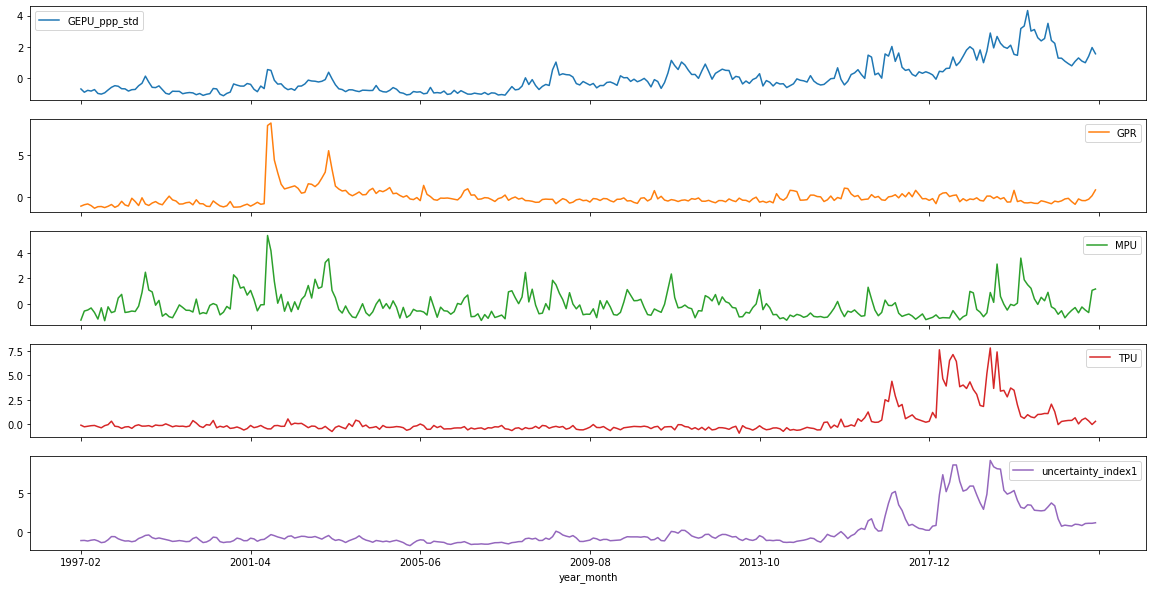

In [52]:
#数据可视化
uncertainty.plot(kind='line',x='year_month',
 y=['GEPU_ppp_std','GPR', 'MPU','TPU','uncertainty_index1'], #2个变量可视化
 subplots=True, #多子图并存
 layout=(5, 1), #子图排列3行2列
 figsize=(20, 10)) #图布的尺寸

### 生成第二步情绪指数

In [53]:
uncertainty.columns

Index(['year_month', 'GEPU_ppp_std', 'GPR', 'MPU', 'TPU', 'GEPU_ppp_std-1',
       'GPR-1', 'MPU-1', 'TPU-1', 'uncertainty_index1'],
      dtype='object')

In [55]:
uncertainty_temp_columns = ['GEPU_ppp_std', 'GPR', 'MPU', 'TPU', 'GEPU_ppp_std-1',
                   'GPR-1', 'MPU-1', 'TPU-1', 'uncertainty_index1']
uncertainty_temp = uncertainty[uncertainty_temp_columns]
uncertainty_temp

,GEPU_ppp_std,GPR,MPU,TPU,GEPU_ppp_std-1,GPR-1,MPU-1,TPU-1,uncertainty_index1
1,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574,-1.16
2,-0.908673,-0.871699,-0.544804,-0.269638,-0.699663,-1.041159,-1.251624,-0.102664,-1.14
3,-0.788572,-0.778317,-0.466961,-0.208063,-0.908673,-0.871699,-0.544804,-0.269638,-1.22
4,-0.834265,-0.976627,-0.305229,-0.154809,-0.788572,-0.778317,-0.466961,-0.208063,-1.11
5,-0.738508,-1.287522,-0.661903,-0.129873,-0.834265,-0.976627,-0.305229,-0.154809,-1.05
...,...,...,...,...,...,...,...,...,...
296,1.085114,-0.373507,-0.227191,0.442091,1.285596,-0.182435,-0.684788,0.027068,0.80
297,0.979317,-0.386753,-0.467593,0.619864,1.085114,-0.373507,-0.227191,0.442091,1.06
298,1.396110,-0.216593,-0.663534,0.334419,0.979317,-0.386753,-0.467593,0.619864,1.09
299,1.951924,0.200959,1.074403,-0.034368,1.396110,-0.216593,-0.663534,0.334419,1.09


In [58]:
corr = uncertainty_temp.corr()
print(corr['uncertainty_index1'].sort_values())
# 选取某个变量 当期与滞后一期中较大值 ，得到TPU-1  GEPU_ppp_std      MPU      GPR                                    

GPR-1                -0.025704
GPR                  -0.014862
MPU-1                 0.069272
MPU                   0.086288
GEPU_ppp_std-1        0.768369
GEPU_ppp_std          0.785414
TPU                   0.923427
TPU-1                 0.931708
uncertainty_index1    1.000000
Name: uncertainty_index1, dtype: float64


In [59]:
uncertainty_columns = ['TPU-1', 'GEPU_ppp_std', 'MPU', 'GPR']

uncertainty2 = uncertainty[uncertainty_columns]

#1.进行标准化 去中心化
factors2 = preprocessing.scale(uncertainty2)
factors2


array([[-0.45035616, -0.69843649, -1.17413972, -0.95463717],
       [-0.25079624, -0.90717493, -0.44123818, -0.79577351],
       [-0.36693488, -0.78722981, -0.3605237 , -0.70823082],
       ...,
       [ 0.25175731,  1.39461752, -0.56434931, -0.18163328],
       [ 0.05321662,  1.94971093,  1.23771532,  0.20980813],
       [-0.20329296,  1.54938199,  1.34410595,  0.8559585 ]])

In [60]:
pca2 = PCA(n_components=1) # 只保留第一主成分
pca2.fit(factors2)

print(f"The amount of variance explained by each of the selected components. {pca2.explained_variance_} ")
print("===============================================================================")
print(f"Percentage of variance explained by each of the selected components. {pca2.explained_variance_ratio_}")
print("===============================================================================")
print(f"第一主成分 {pca2.components_}")

The amount of variance explained by each of the selected components. [1.6741819] 
Percentage of variance explained by each of the selected components. [0.41715032]
第一主成分 [[0.55406841 0.66910997 0.43093011 0.24412967]]


In [61]:
uncertainty_index2 = np.around(pca2.fit_transform(factors2),decimals=2)
print(uncertainty_index2.T)

[[-1.46 -1.13 -1.06 -1.04 -1.18 -1.53 -1.21 -1.67 -0.95 -0.95 -0.78 -0.49
  -0.36 -1.17 -1.22 -0.9  -1.07 -0.73  0.1   0.89 -0.02 -0.23 -0.71 -0.45
  -1.21 -1.15 -1.13 -1.19 -1.07 -0.89 -1.09 -1.12 -1.11 -1.23 -0.5  -1.17
  -1.34 -1.44 -1.02 -0.61 -0.56 -1.49 -1.42 -1.13 -0.99  0.29  0.14 -0.19
  -0.17 -0.38 -0.25 -0.6  -1.13 -0.7  -0.74  4.54  3.99  1.49  0.34  0.36
  -0.55 -0.28 -0.27 -0.19 -0.29 -0.08  0.17  0.84  0.26  0.91  0.63  0.77
   1.86  2.97  0.97 -0.09 -0.59 -0.74 -0.63 -0.93 -0.93 -1.06 -0.56 -0.37
  -0.89 -0.83 -0.74 -0.38 -0.31 -0.82 -0.47 -0.59 -0.36 -0.63 -1.19 -0.9
  -1.32 -1.41 -1.06 -0.98 -1.02 -0.66 -1.05 -0.36 -1.03 -1.25 -0.94 -0.93
  -1.2  -1.28 -1.07 -0.89 -0.73 -0.41 -0.27 -1.34 -1.2  -1.3  -1.51 -1.18
  -1.47 -1.13 -1.42 -1.33 -1.25 -1.27 -0.42 -0.16 -0.57 -0.72 -0.3   0.77
  -0.47  0.13 -0.69 -1.09 -0.94 -0.4  -0.68  0.93  1.03  0.28  0.14 -0.21
   0.14 -0.28 -0.56 -0.62 -0.87 -0.92 -1.   -0.59 -0.99 -0.46 -0.69 -0.25
  -0.58 -1.02 -0.92 -0.45 -0.2   0.24 -

In [62]:
uncertainty_pca_index2 = uncertainty.join(pd.DataFrame(uncertainty_index2,columns=['uncertainty_index2'],index = uncertainty.index))
uncertainty_pca_index2

,year_month,GEPU_ppp_std,GPR,MPU,TPU,GEPU_ppp_std-1,GPR-1,MPU-1,TPU-1,uncertainty_index1,uncertainty_index2
1,1997-02,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574,-1.16,-1.46
2,1997-03,-0.908673,-0.871699,-0.544804,-0.269638,-0.699663,-1.041159,-1.251624,-0.102664,-1.14,-1.13
3,1997-04,-0.788572,-0.778317,-0.466961,-0.208063,-0.908673,-0.871699,-0.544804,-0.269638,-1.22,-1.06
4,1997-05,-0.834265,-0.976627,-0.305229,-0.154809,-0.788572,-0.778317,-0.466961,-0.208063,-1.11,-1.04
5,1997-06,-0.738508,-1.287522,-0.661903,-0.129873,-0.834265,-0.976627,-0.305229,-0.154809,-1.05,-1.18
...,...,...,...,...,...,...,...,...,...,...,...
296,2021-09,1.085114,-0.373507,-0.227191,0.442091,1.285596,-0.182435,-0.684788,0.027068,0.80,0.51
297,2021-10,0.979317,-0.386753,-0.467593,0.619864,1.085114,-0.373507,-0.227191,0.442091,1.06,0.49
298,2021-11,1.396110,-0.216593,-0.663534,0.334419,0.979317,-0.386753,-0.467593,0.619864,1.09,0.79
299,2021-12,1.951924,0.200959,1.074403,-0.034368,1.396110,-0.216593,-0.663534,0.334419,1.09,1.92


In [64]:
temp1 = WTI_spot_future_rate.join(uncertainty_pca_index2.set_index('year_month'),on='year_month',how = 'inner',rsuffix = '_index')
temp1['LogReturn_spot']=np.log(temp1['price']/temp1['price'].shift(1))
temp1['LogReturn_future']=np.log(temp1['price_future']/temp1['price_future'].shift(1))
temp1 = temp1.dropna()
temp1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,price,price_future,rate,rate_daily,year_month,GEPU_ppp_std,GPR,MPU,TPU,GEPU_ppp_std-1,GPR-1,MPU-1,TPU-1,uncertainty_index1,uncertainty_index2,LogReturn_spot,LogReturn_future
2819,1997-02-04,24.00,24.02,5.54,0.000154,1997-02,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574,-1.16,-1.46,-0.008299,-0.005398
2820,1997-02-05,23.90,23.91,5.53,0.000154,1997-02,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574,-1.16,-1.46,-0.004175,-0.004590
2821,1997-02-06,23.05,23.10,5.53,0.000154,1997-02,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574,-1.16,-1.46,-0.036213,-0.034464
2822,1997-02-07,22.30,22.23,5.49,0.000152,1997-02,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574,-1.16,-1.46,-0.033079,-0.038390
2823,1997-02-10,22.45,22.46,5.50,0.000153,1997-02,-0.699663,-1.041159,-1.251624,-0.102664,-0.731695,-0.966219,-0.678014,-0.389574,-1.16,-1.46,0.006704,0.010293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,2022-01-25,86.61,85.60,0.65,0.000018,2022-01,1.551075,0.890211,1.177008,0.292372,1.951924,0.200959,1.074403,-0.034368,1.16,1.71,0.024900,0.027117
9101,2022-01-26,88.33,87.35,0.70,0.000019,2022-01,1.551075,0.890211,1.177008,0.292372,1.951924,0.200959,1.074403,-0.034368,1.16,1.71,0.019665,0.020238
9102,2022-01-27,87.61,86.61,0.75,0.000021,2022-01,1.551075,0.890211,1.177008,0.292372,1.951924,0.200959,1.074403,-0.034368,1.16,1.71,-0.008185,-0.008508
9103,2022-01-28,87.67,86.82,0.75,0.000021,2022-01,1.551075,0.890211,1.177008,0.292372,1.951924,0.200959,1.074403,-0.034368,1.16,1.71,0.000685,0.002422


In [65]:
WTI_uncertainty = temp1[['date','year_month','price','price_future','LogReturn_spot','LogReturn_future',\
                 'rate_daily','GEPU_ppp_std','GPR','MPU','TPU','uncertainty_index1','uncertainty_index2']]
# WTI_Gepu['date'] = WTI_Gepu['date'].astype(str).apply(lambda x : x[0:10])
WTI_uncertainty.set_index('date',inplace=True)
WTI_uncertainty

,year_month,price,price_future,LogReturn_spot,LogReturn_future,rate_daily,GEPU_ppp_std,GPR,MPU,TPU,uncertainty_index1,uncertainty_index2
date,,,,,,,,,,,,
1997-02-04,1997-02,24.00,24.02,-0.008299,-0.005398,0.000154,-0.699663,-1.041159,-1.251624,-0.102664,-1.16,-1.46
1997-02-05,1997-02,23.90,23.91,-0.004175,-0.004590,0.000154,-0.699663,-1.041159,-1.251624,-0.102664,-1.16,-1.46
1997-02-06,1997-02,23.05,23.10,-0.036213,-0.034464,0.000154,-0.699663,-1.041159,-1.251624,-0.102664,-1.16,-1.46
1997-02-07,1997-02,22.30,22.23,-0.033079,-0.038390,0.000152,-0.699663,-1.041159,-1.251624,-0.102664,-1.16,-1.46
1997-02-10,1997-02,22.45,22.46,0.006704,0.010293,0.000153,-0.699663,-1.041159,-1.251624,-0.102664,-1.16,-1.46
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25,2022-01,86.61,85.60,0.024900,0.027117,0.000018,1.551075,0.890211,1.177008,0.292372,1.16,1.71
2022-01-26,2022-01,88.33,87.35,0.019665,0.020238,0.000019,1.551075,0.890211,1.177008,0.292372,1.16,1.71
2022-01-27,2022-01,87.61,86.61,-0.008185,-0.008508,0.000021,1.551075,0.890211,1.177008,0.292372,1.16,1.71


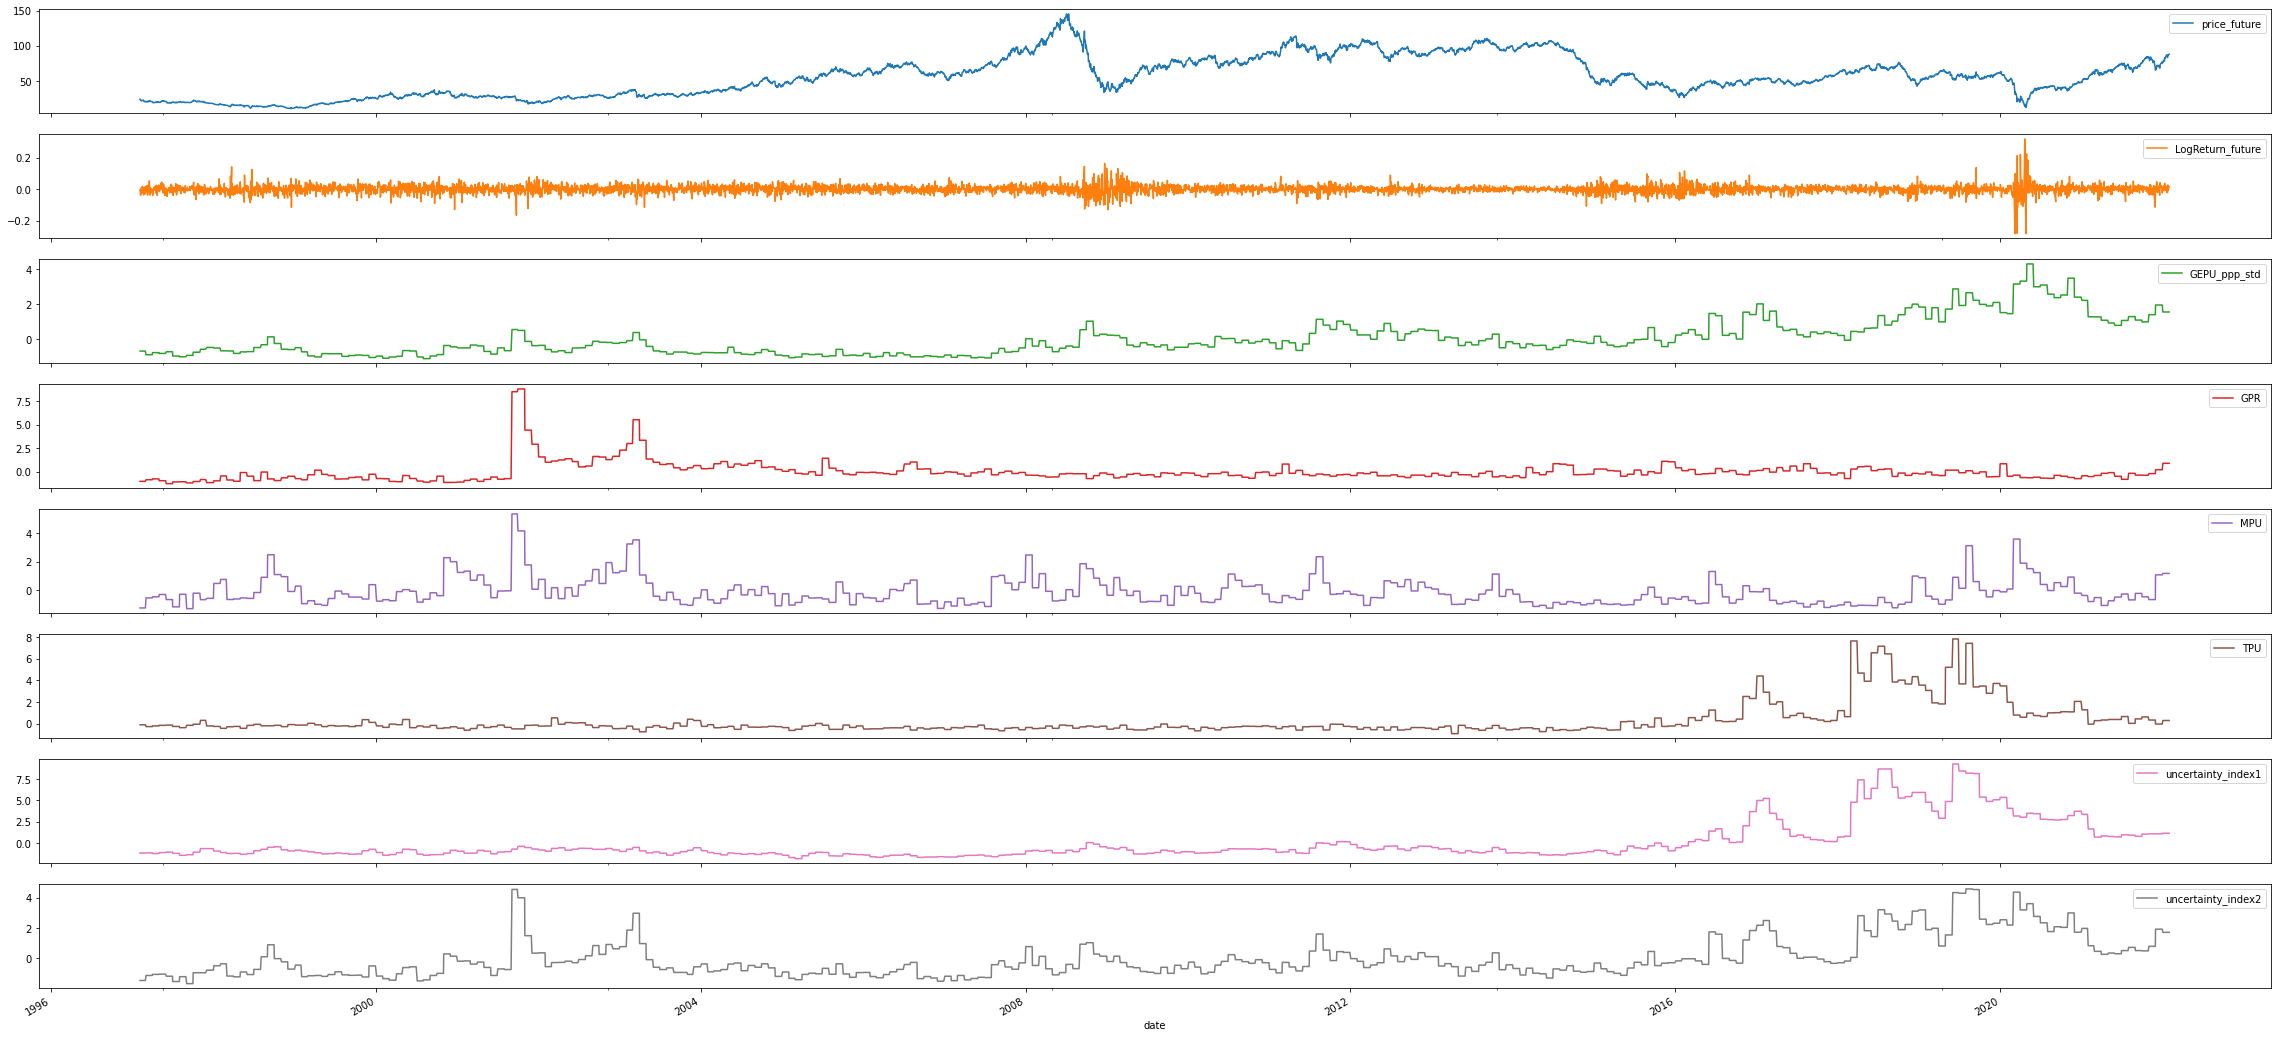

In [66]:
#数据可视化
ax = WTI_uncertainty.plot(kind='line',use_index=True,
 y=['price_future','LogReturn_future','GEPU_ppp_std','GPR','MPU','TPU','uncertainty_index1','uncertainty_index2'], #2个变量可视化
 subplots=True, #多子图并存
 layout=(8, 1), #子图排列3行2列
 figsize=(40, 20)) #图布的尺寸

In [67]:
writer = pd.ExcelWriter('WTI_uncertainty.xlsx')
WTI_uncertainty.to_excel(writer)
writer.save()
print('DataFrame is written successfully to the Excel File.')

DataFrame is written successfully to the Excel File.
